In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("laptop_data.csv")

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.shape

(1303, 12)

In [6]:
data.size

15636

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
data=data.drop(columns=['Unnamed: 0'])

In [11]:
data['OpSys']=data['OpSys'].replace(['No OS'],'windows 10')

In [12]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,windows 10,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
data.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [14]:
data["Cpu_Speed"]=data["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz","")
data["Cpu_Vender"]=data["Cpu"].str.split(" ").apply(lambda x: x[0])
data["Cpu_Type"]=data["Cpu"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1]=="Core" or x[0]=="AMD") else x[0]))
data["Cpu_Type"]=data["Cpu_Type"].apply(lambda x: ' '.join(x))
data["Cpu_Type"]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Speed,Cpu_Vender,Cpu_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2.3,Intel,Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.8,Intel,Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,windows 10,1.86kg,30636.0000,2.5,Intel,Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.7,Intel,Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,3.1,Intel,Core i5


In [15]:
split=data['Memory'].str.split(' ',1, expand=True)
data['Storage Type']=split[1]
data['memory']=split[0]
data['Memory'].unique()
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2.3,Intel,Core i5,SSD,128GB
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.8,Intel,Core i5,Flash Storage,128GB
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,windows 10,1.86kg,30636.0000,2.5,Intel,Core i5,SSD,256GB
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.7,Intel,Core i7,SSD,512GB
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,3.1,Intel,Core i5,SSD,256GB


In [16]:
data["Ram"]=data["Ram"].str.replace("GB","")
data["Weight"]=data["Weight"].str.replace("kg","")
data.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2.3,Intel,Core i5,SSD,128GB
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.8,Intel,Core i5,Flash Storage,128GB
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,windows 10,1.86,30636.0000,2.5,Intel,Core i5,SSD,256GB
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.7,Intel,Core i7,SSD,512GB
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,3.1,Intel,Core i5,SSD,256GB


In [17]:
df_mem=data['Memory'].str.split('(\d+)', expand=True)

In [18]:
data['Memory']=pd.to_numeric(df_mem[1])

In [19]:
data.rename(columns={'Memory': 'Memory(GB or TB)'}, inplace=True)


In [20]:
def mem(x):
    if x==1:
        return 1024
    elif x==2:
        return 2048
    

In [21]:
data['Memory(GB or TB)'] = data['Memory(GB or TB)'].apply(lambda x:1024 if x==1 else x)

In [22]:
data['Memory(GB or TB)'] = data['Memory(GB or TB)'].apply(lambda x:2048 if x==2 else x)

In [23]:
data.rename(columns={'Memory(GB or TB)':'Storage(GB)'},inplace=True)

In [24]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage(GB),Gpu,OpSys,Weight,Price,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,memory
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2.3,Intel,Core i5,SSD,128GB
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.8,Intel,Core i5,Flash Storage,128GB
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,windows 10,1.86,30636.0000,2.5,Intel,Core i5,SSD,256GB
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.7,Intel,Core i7,SSD,512GB
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,3.1,Intel,Core i5,SSD,256GB


In [25]:
gpu_distribution_list=data["Gpu"].str.split(" ")
data["Gpu_Vender"]=data["Gpu"].str.split(" ").apply(lambda x: x[0])
data["Gpu_Type"]=data["Gpu"].str.split(" ").apply(lambda x: x[1])
data["Gpu_Type"]=data["Gpu_Type"].apply(lambda x: ' '.join(x))
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage(GB),Gpu,OpSys,Weight,Price,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,memory,Gpu_Vender,Gpu_Type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2.3,Intel,Core i5,SSD,128GB,Intel,I r i s
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.8,Intel,Core i5,Flash Storage,128GB,Intel,H D
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,windows 10,1.86,30636.0000,2.5,Intel,Core i5,SSD,256GB,Intel,H D
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.7,Intel,Core i7,SSD,512GB,AMD,R a d e o n
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,3.1,Intel,Core i5,SSD,256GB,Intel,I r i s


In [26]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
def cat_os(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macO5' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

    data['OpSys']=data['OpSys'].apply(cat_os)

In [29]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage(GB),Gpu,OpSys,Weight,Price,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,memory,Gpu_Vender,Gpu_Type,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2.3,Intel,Core i5,SSD,128GB,Intel,I r i s,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,47895.5232,1.8,Intel,Core i5,Flash Storage,128GB,Intel,H D,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,windows 10,1.86,30636.0000,2.5,Intel,Core i5,SSD,256GB,Intel,H D,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,135195.3360,2.7,Intel,Core i7,SSD,512GB,AMD,R a d e o n,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,3.1,Intel,Core i5,SSD,256GB,Intel,I r i s,0,1


In [30]:
data=data.reindex(columns=["Company","TypeName","Inches","Touchscreen","IPS","Cpu_Vender","Cpu_Type","Ram","Storage(GB)","Storage Type","Gpu_Vender","Gpu_Type","Weight","OpSys","Price"])

In [31]:
data.head()

,Company,TypeName,Inches,Touchscreen,IPS,Cpu_Vender,Cpu_Type,Ram,Storage(GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,I r i s,1.37,macOS,71378.6832
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,H D,1.34,macOS,47895.5232
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,H D,1.86,windows 10,30636.0000
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,R a d e o n,1.83,macOS,135195.3360
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,I r i s,1.37,macOS,96095.8080


In [32]:
data.sample(40)

,Company,TypeName,Inches,Touchscreen,IPS,Cpu_Vender,Cpu_Type,Ram,Storage(GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price
315,Dell,Notebook,15.6,0,0,Intel,Core i5,8,128,SSD + 1TB HDD,AMD,R a d e o n,2.33,Windows 10,44968.3200
721,HP,2 in 1 Convertible,13.3,1,1,Intel,Core i5,8,256,SSD,Intel,H D,1.58,Windows 10,44574.0480
203,Lenovo,Gaming,15.6,0,1,Intel,Core i7,16,512,SSD + 1TB HDD,Nvidia,G e F o r c e,3.2,Windows 10,93186.7200
516,HP,Notebook,15.6,1,0,Intel,Core i5,4,1024,HDD,Intel,U H D,2.04,Windows 10,27783.9216
1246,Dell,Notebook,14.0,0,0,Intel,Core i5,4,500,HDD,Intel,H D,1.6,Windows 10,46620.0000
105,HP,Notebook,14.0,0,1,Intel,Core i5,6,256,SSD,Nvidia,G e F o r c e,1.58,Windows 10,35111.5200
143,Toshiba,Notebook,15.6,0,0,Intel,Core i5,4,500,HDD,Intel,H D,2.1,Windows 10,32074.5600
145,Asus,Ultrabook,14.0,0,0,Intel,Core i7,8,256,SSD,Intel,U H D,1.25,Windows 10,58554.7200
473,Dell,Ultrabook,13.3,1,0,Intel,Core i5,8,256,SSD,Intel,U H D,1.42,Windows 10,98133.7680
1036,HP,Notebook,15.6,0,0,Intel,Core i5,4,500,HDD,Intel,H D,2.04,Windows 10,39533.7600


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   IPS           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   object 
 8   Storage(GB)   1303 non-null   int64  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   object 
 13  OpSys         1303 non-null   object 
 14  Price         1303 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 152.8+ KB


In [34]:
data["Ram"]=data["Ram"].astype("int")
data["Storage(GB)"]=data["Storage(GB)"].astype("int")
data["Weight"]=data["Weight"].astype("float")

In [35]:
sns.set(rc={"figure.figsize":(9,5)})

<AxesSubplot:>

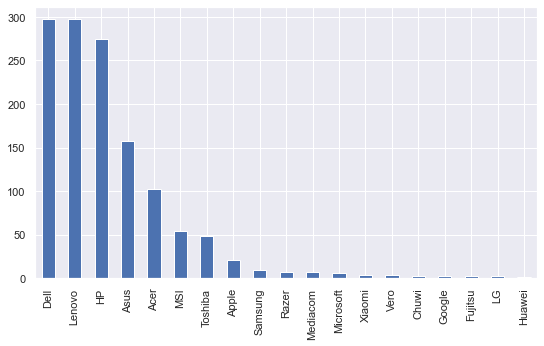

In [36]:
data["Company"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Company', ylabel='Price'>

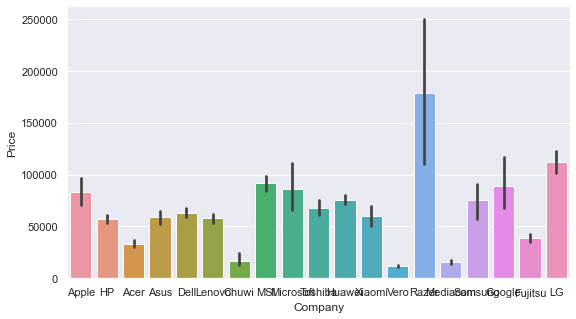

In [37]:
sns.barplot(x=data["Company"],y=data["Price"])

<AxesSubplot:>

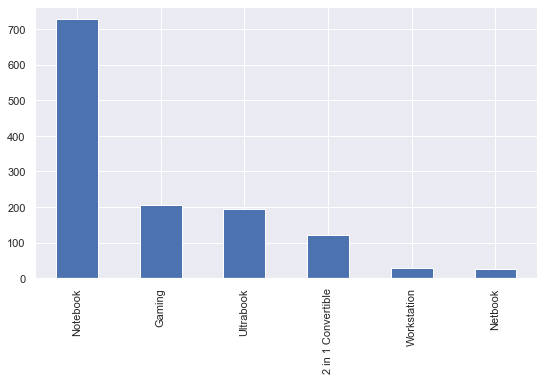

In [38]:
data["TypeName"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

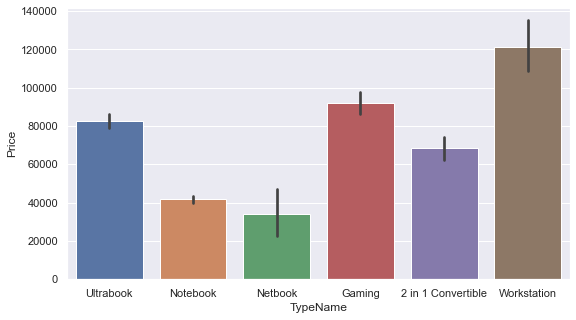

In [39]:
sns.barplot(x=data['TypeName'],y=data['Price'])

In [40]:
cpu_distribution=data["Cpu_Type"].value_counts()[:10].reset_index()
cpu_distribution

,index,Cpu_Type
0,Core i7,527
1,Core i5,423
2,Core i3,136
3,Celeron Dual Core,80
4,I n t e l,47
5,Core M,19
6,A9-Series 9420,12
7,Celeron Quad Core,8
8,A6-Series 9220,8
9,A12-Series 9720P,7


<AxesSubplot:xlabel='index', ylabel='Cpu_Type'>

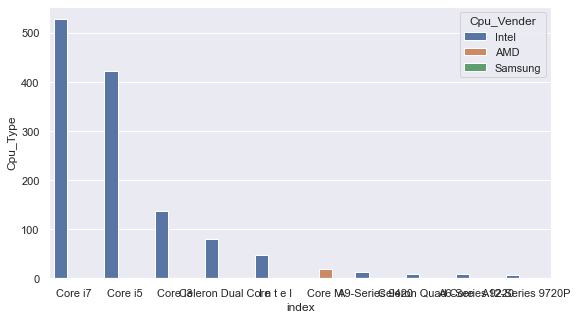

In [41]:
sns.barplot(x=cpu_distribution["index"],y=cpu_distribution["Cpu_Type"],hue="Cpu_Vender",data=data)

In [42]:
gpu_distribution=data["Gpu_Type"].value_counts()[:10].reset_index()
gpu_distribution

,index,Gpu_Type
0,H D,639
1,G e F o r c e,368
2,R a d e o n,173
3,U H D,68
4,Q u a d r o,31
5,I r i s,14
6,F i r e P r o,5
7,R 4,1
8,G T X,1
9,R 1 7 M - M 1 - 7 0,1


<AxesSubplot:xlabel='index', ylabel='Gpu_Type'>

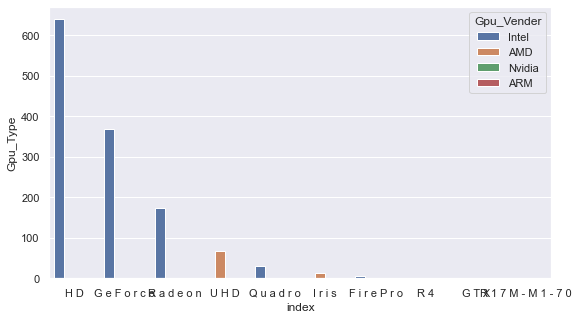

In [43]:
sns.barplot(x=gpu_distribution["index"],y=gpu_distribution["Gpu_Type"],hue="Gpu_Vender",data=data)

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

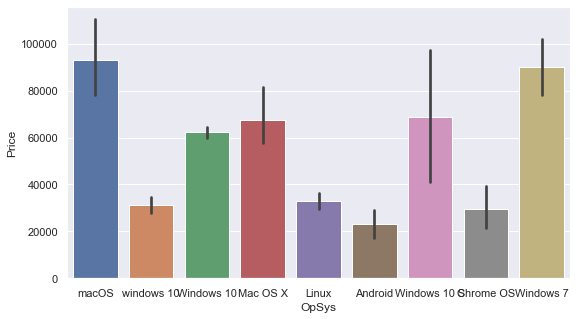

In [44]:
sns.barplot(x=data['OpSys'],y=data['Price'])

In [45]:
corr_data=data.corr()
corr_data["Price"].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Storage(GB)   -0.125363
Name: Price, dtype: float64

<AxesSubplot:>

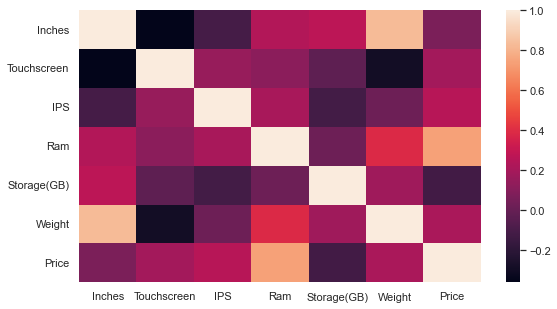

In [46]:
sns.heatmap(data.corr())

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x]=le.fit_transform(data[x])

In [48]:
x=data.drop(columns=['Price'])
y=np.log(data['Price'])

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=2)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
temp=scaler.fit_transform(x)
x=pd.DataFrame(temp)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
from sklearn.metrics import r2_score

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predict=lr.predict(x_test)
r2_score(y_test,y_predict)

0.6014333177848483

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
random=RandomForestRegressor()
random.fit(x_train,y_train)
y_predict=random.predict(x_test)
r2_score(y_test,y_predict)

0.8855937200014905

In [56]:
from sklearn.svm import SVR

In [57]:
svm=SVR()
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
r2_score(y_test,y_predict)

0.417511119780413

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [60]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,1,5,6,9,10,11,13])],remainder='passthrough')

rf=RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt=GradientBoostingRegressor(n_estimators=100,max_features=0.5)

In [61]:
svm=SVR()
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)
r2_score(y_test,y_predict)

0.417511119780413